In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#package to read xml files
from xml.etree import cElementTree as ET

**Build Table from XML file (Function)**

In [152]:
def read_trackmate_xml_tracks(xml_file):
    """Read tracks from trackmate xml track file and returns a DataFrame 
    in similar format as the trackmate csv, plus the frame interval is returned"""
    
    tracks = ET.parse(xml_file)
    frame_interval = float(tracks.getroot().attrib["frameInterval"])
    
    attributes = []
    for ti, track in enumerate(tracks.iterfind('particle')):
        for spots in track.iterfind('detection'):
            attributes.append([ti, int(spots.attrib.get('t')),
                                   float(spots.attrib.get('x')),
                                   float(spots.attrib.get('y'))])

    track_table = pd.DataFrame(attributes, columns=['TRACK_ID','FRAME','POSITION_X','POSITION_Y'])
    
    return track_table, frame_interval

**Apply Function to XML files**

In [153]:
filename = 'data_examples/FtsN_SPT_Tracks.xml'

table_txy, frame_interval = read_trackmate_xml_tracks(filename)
table_txy.tail(10) #take a look at the table format

,TRACK_ID,FRAME,POSITION_X,POSITION_Y
9242,211,390,47.604520,26.552509
9243,211,391,48.082336,26.514065
9244,211,392,47.788498,27.016359
9245,211,393,47.860120,26.590826
9246,211,394,47.062073,27.135102
9247,211,395,46.878961,26.716365
9248,211,396,47.133485,27.069344
9249,211,397,47.190595,26.688059
9250,211,398,47.288485,27.910766
9251,211,399,47.060075,28.284841


**Plot Trajectories**

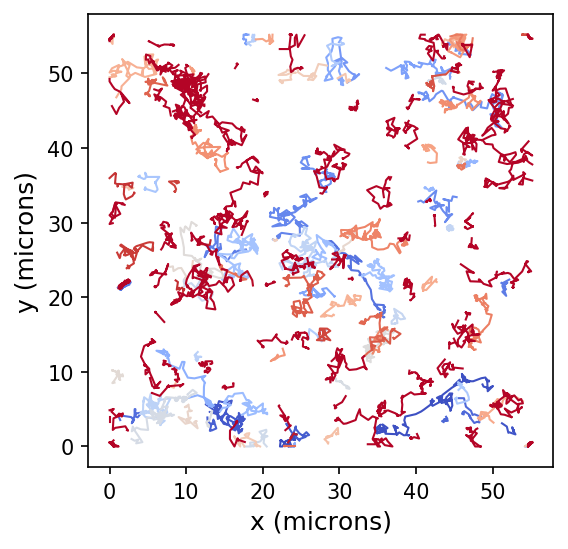

In [158]:
truncate = -1 #truncate number of spots to plot if necessary , -1 plots all spots/trajectories

fig, ax = plt.subplots(figsize=(4,4), dpi =150)

plt.xlabel('x (microns)', fontsize=12)
plt.ylabel('y (microns)', fontsize=12)

#plt.xlim([0,55])
#plt.ylim([0,55])

for groups, columns in table_txy[:truncate].groupby('TRACK_ID'):
    plt.plot(columns['POSITION_X'],columns['POSITION_Y'], lw = 1, color = plt.cm.coolwarm(groups/100))
    
#save figure
plt.savefig('plot_examples/TrackMate Trajectories.png', transparent = True, bbox_inches = 'tight')